<a href="https://colab.research.google.com/github/RohiniRoopa/Machine_Learning/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Recognition**

In [ ]:
!pip install tensorflow-gpu==2.0.0

In [2]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.15.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


The face_recognition library for facial recognition and facial analysis is installed. It provides various functions for tasks such as:

1.   Recognizing and identifying faces in images or videos.
2.   Comparing faces and measuring their similarity.
3.   Extracting facial features and landmarks.
4.   Detecting faces in images or videos.


In [3]:
!pip install face_recognition==1.2.2

Pillow is a widely-used Python library for image processing and manipulation. It supports a wide range of image formats, including JPEG, PNG, GIF, TIFF, and BMP. Pillow provides various functions for tasks such as:

1.   Opening, saving, and manipulating images.
2.   Cropping, resizing, and rotating images.
3.   Applying filters and effects to images.
4.   Extracting metadata from images and,
creating and drawing shapes and text on images.

In [4]:
!pip install pillow

The below code shows functions for querying information about available devices on your system that TensorFlow can use for computation. This includes both CPUs and GPUs.

In [5]:
from tensorflow. python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14732299185589818346
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7688277109413664440
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


The below import allow image processinga and manipulation, draw shapes and text on the images and face_recognition to detect and extract features.

In [6]:
import PIL.Image
import PIL.ImageDraw
import face_recognition

In [7]:
# Load the image into a numpy array
image= face_recognition.load_image_file("/content/pic.png")

Phil Schiller, Tony Fadell, Jony Ive, Steve Jobs, Scott Forstall, and Eddy Cue. Only Schiller and Cue are still at Apple.

In [8]:
# find all faces in the image
face_locations = face_recognition.face_locations(image)

In [9]:
no_of_face= len(face_locations)
print("I found {} face(s) in this input image.".format(no_of_face))

I found 6 face(s) in this input image.


In [10]:
#Load the image into Python Image Library object so that we can draw on top of it and display it
pil_image= PIL.Image.fromarray(image)

In [11]:
#Print the location of each face in this image.
#Each face is a list of coordinates in (top, right, bottom, left) order.


for face in face_locations:
  top, right, bottom, left= face
  print("A face is located at pixel location top:{}, left:{},bottom: {}, right: {}"
  .format(top, left,bottom, right))

  # Draw box around the face

  draw= PIL.ImageDraw.Draw(pil_image)
  draw.rectangle([left,top,right,bottom],outline= 'red', width=2)

A face is located at pixel location top:80, left:262,bottom: 155, right: 337
A face is located at pixel location top:80, left:428,bottom: 155, right: 502
A face is located at pixel location top:130, left:121,bottom: 204, right: 196
A face is located at pixel location top:46, left:802,bottom: 136, right: 892
A face is located at pixel location top:46, left:673,bottom: 136, right: 763
A face is located at pixel location top:72, left:527,bottom: 146, right: 602


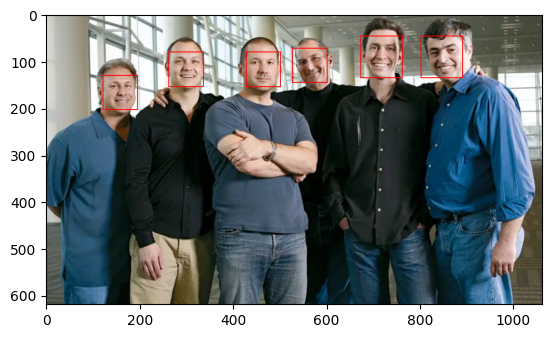

In [12]:
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
%matplotlib inline

imshow(pil_image)

In [13]:
# Find all the facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

In [14]:
# Loop over each face
for face_landmarks in face_landmarks_list:
  #Loop over each facial feature (eye, nose, mouth, lips, etc)
  for name, list_of_points in face_landmarks.items():
    # Print the location of each facial feature in this image
    print("The {} in this face has the following points:{}".
          format(name, list_of_points))
    # Let's trace out each facial feature in the image with a line!
    draw.line(list_of_points, fill="red", width=3)

The chin in this face has the following points:[(261, 106), (262, 115), (263, 124), (265, 133), (269, 141), (276, 148), (285, 154), (295, 157), (305, 158), (314, 157), (321, 153), (327, 147), (331, 140), (334, 132), (335, 124), (336, 116), (336, 108)]
The left_eyebrow in this face has the following points:[(272, 95), (277, 91), (284, 90), (290, 91), (296, 94)]
The right_eyebrow in this face has the following points:[(311, 93), (316, 91), (322, 90), (327, 91), (330, 96)]
The nose_bridge in this face has the following points:[(304, 100), (304, 105), (305, 110), (305, 116)]
The nose_tip in this face has the following points:[(297, 120), (301, 121), (304, 122), (308, 121), (311, 120)]
The left_eye in this face has the following points:[(280, 102), (284, 100), (288, 100), (292, 102), (288, 103), (284, 103)]
The right_eye in this face has the following points:[(313, 103), (316, 100), (320, 101), (324, 103), (321, 103), (317, 103)]
The top_lip in this face has the following points:[(287, 131)

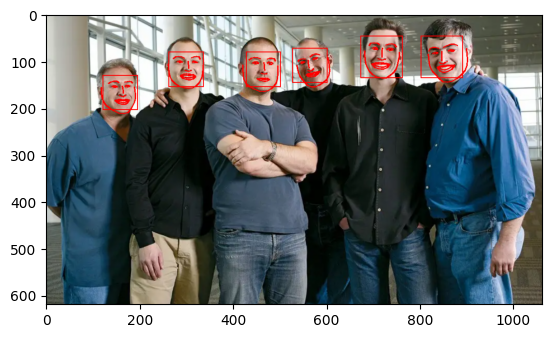

In [15]:
imshow(pil_image)

In [16]:
#Generate the face encodings
face_encodings= face_recognition.face_encodings(image)

In [17]:
if len(face_encodings) == 0:
  # No faces found in image.
  print("No faces were found.")

else:
  #Grab the first face encoding
  first_face_encoding = face_encodings[0]

  # Print the results
  print(first_face_encoding)

[-8.83959755e-02  3.22925448e-02  1.04319602e-02  6.51240870e-02
 -8.59759748e-02 -2.90799364e-02  3.34433988e-02 -1.01274803e-01
  1.15690075e-01 -2.60544717e-02  2.20544457e-01  6.59829751e-03
 -3.50431353e-01 -8.80531967e-02  3.14002335e-02  9.36328620e-02
 -5.89198694e-02 -1.94232509e-01 -7.99760967e-02 -7.42513984e-02
  4.02129814e-02  3.50177139e-02  1.12054497e-02 -1.28155947e-02
 -1.70252234e-01 -3.39640856e-01 -4.50239442e-02 -7.35880435e-02
 -2.86388397e-03 -1.36048943e-01  1.34815350e-02  1.52670190e-01
 -1.38766780e-01 -5.49013838e-02  5.65815717e-02  1.14780709e-01
 -6.67016208e-02 -3.95060331e-02  2.54779994e-01  3.90608832e-02
 -2.31149703e-01 -6.84012175e-02  1.33337826e-02  3.33802819e-01
  2.29154259e-01  1.05110556e-03  7.66778067e-02 -3.16874981e-02
  3.20683867e-02 -2.88519025e-01  9.00492072e-02  1.44331783e-01
  1.31089628e-01  6.99773282e-02  9.19131935e-03 -1.99296713e-01
 -3.90253067e-02  9.25502926e-02 -2.68889844e-01  7.14528337e-02
  8.69244933e-02 -1.88631